In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import numpy as np
import collections

In [19]:
raw_input = pd.read_csv('data/amazon/ratings_Books.csv', keep_default_na=True, 
                        names=['User', 'Product', 'Ratings', 'Timestamp']
                       ).drop(columns=['Timestamp'])

In [20]:
def filter_and_generate_distribution(raw_input_df, review_count_threshold = 100):
    print('Size before filtering = {}'.format(raw_input_df.size))
    valid_input = raw_input.groupby(['Product']).filter(lambda x: len(x)>review_count_threshold)
    print('Size after filtering = {}'.format(valid_input.size))
    
    review_distribution = valid_input.groupby(['Ratings']).size().reset_index(name='counts')
    total_review_count = review_distribution['counts'].sum()
    review_distribution['counts'] = review_distribution['counts'].div(total_review_count)
    
    return review_distribution
    

In [21]:
# filters the users by the number of reviews
def gen_distribution_filtered_by_user(raw_input_df, min_review_count=1, max_review_count=10):
    print('Size before filtering = {}'.format(raw_input_df.size))
    valid_input = raw_input.drop(columns=['Product']).groupby(['User']).filter(
        lambda x: len(x)>min_review_count and len(x)<max_review_count
    )
    print('Size after filtering = {}'.format(valid_input.size))
    
    review_distribution = valid_input.groupby(['Ratings']).size().reset_index(name='counts')
    total_review_count = review_distribution['counts'].sum()
    review_distribution['counts'] = review_distribution['counts'].div(total_review_count)
    
    return review_distribution


In [67]:
review_dist_10   = filter_and_generate_distribution(raw_input, review_count_threshold=10)
review_dist_100  = filter_and_generate_distribution(raw_input, review_count_threshold=100)

Size before filtering = 2649506
Size after filtering = 2426930
Size before filtering = 2649506
Size after filtering = 1514738


In [8]:
# Plot ratings distribution filtered by user
review_dist_1_10 = gen_distribution_filtered_by_user(raw_input, min_review_count=1, max_review_count=10)
review_dist_1_100 = gen_distribution_filtered_by_user(raw_input, min_review_count=1, max_review_count=100)
review_dist_1_1000 = gen_distribution_filtered_by_user(raw_input, min_review_count=1, max_review_count=1000)
review_dist_1_1mm = gen_distribution_filtered_by_user(raw_input, min_review_count=1, max_review_count=1e6)

Size before filtering = 3974259
Size after filtering = 1060784
Size before filtering = 3974259
Size after filtering = 1349158
Size before filtering = 3974259
Size after filtering = 1375772
Size before filtering = 3974259
Size after filtering = 1375772


In [22]:
review_dist_10_100 = gen_distribution_filtered_by_user(raw_input, min_review_count=10, max_review_count=100)
review_dist_10_100.head()

Size before filtering = 67521465
Size after filtering = 11051620


,Ratings,counts
0,1.0,0.041240
1,2.0,0.048616
2,3.0,0.103902
3,4.0,0.230963
4,5.0,0.575278


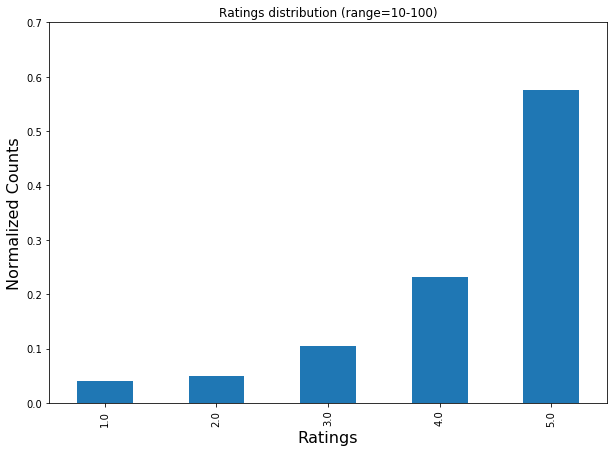

In [24]:
ax1 = review_dist_10_100.set_index(['Ratings']).plot(kind='bar', title ="Ratings distribution (range=10-100)",figsize=(10,7),legend=False, fontsize=10)
ax1.set_xlabel("Ratings",fontsize=16)
ax1.set_ylabel("Normalized Counts",fontsize=16)
ax1.set_ylim([0,0.7])
plt.savefig('results/amazon/userFilter/reviewDist_Books_10_100.png')

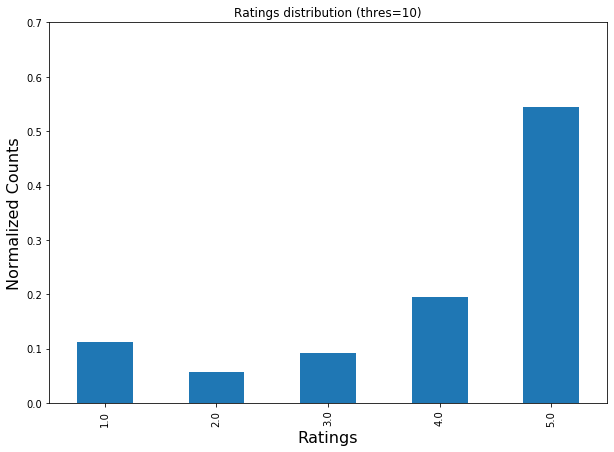

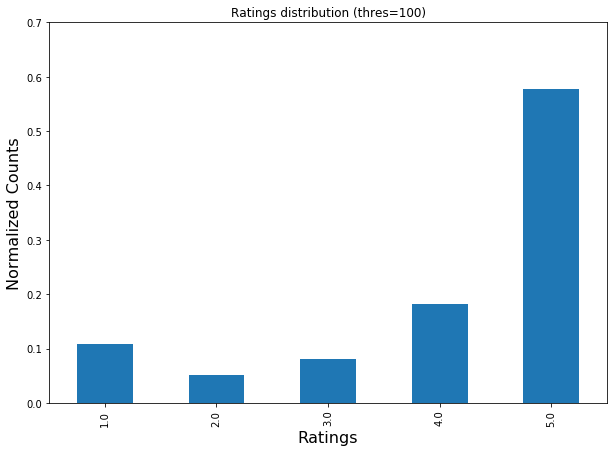

In [68]:
# Plot ratings distributuion filtered by product
ax1 = review_dist_10.set_index(['Ratings']).plot(kind='bar', title ="Ratings distribution (thres=10)",figsize=(10,7),legend=False, fontsize=10)
ax1.set_xlabel("Ratings",fontsize=16)
ax1.set_ylabel("Normalized Counts",fontsize=16)
ax1.set_ylim([0,0.7])
plt.savefig('results/amazon/reviewDist_VideoGames_10.png')


ax2 = review_dist_100.set_index(['Ratings']).plot(kind='bar', title ="Ratings distribution (thres=100)",figsize=(10,7),legend=False, fontsize=10)
ax2.set_xlabel("Ratings",fontsize=16)
ax2.set_ylabel("Normalized Counts",fontsize=16)
ax2.set_ylim([0,0.7])
plt.savefig('results/amazon/reviewDist_VideoGames_100.png')

In [39]:
review_count_threshold = 10
valid_input = raw_input.groupby(['Product']).filter(lambda x: len(x)>review_count_threshold)

In [20]:
grouped_data = valid_input.groupby(['Product','Ratings']).size().reset_index(name='counts')

In [21]:
grouped_data.head()

,Product,Ratings,counts
0,0972683275,1.0,32
1,0972683275,2.0,28
2,0972683275,3.0,56
3,0972683275,4.0,232
4,0972683275,5.0,703


In [22]:
grouped_data.size

195255

In [23]:
# calculate the noramized ratings for the producs
product_review_counts = grouped_data.groupby(['Product'])['counts'].transform('sum')
normalized_counts = grouped_data
normalized_counts['counts'] = normalized_counts['counts'].div(product_review_counts)

In [24]:
normalized_counts.head()

,Product,Ratings,counts
0,0972683275,1.0,0.030447
1,0972683275,2.0,0.026641
2,0972683275,3.0,0.053283
3,0972683275,4.0,0.220742
4,0972683275,5.0,0.668887


In [42]:
#review_distribution = normalized_counts.groupby(['Ratings'])['counts'].sum()
review_distribution = valid_input.groupby(['Ratings']).size().reset_index(name='counts')
total_review_count = review_distribution['counts'].sum()
review_distribution['counts'] = review_distribution['counts'].div(total_review_count)

In [43]:
review_distribution.head()

,Ratings,counts
0,1.0,0.111334
1,2.0,0.057353
2,3.0,0.079478
3,4.0,0.190561
4,5.0,0.561273


Text(0, 0.5, 'Normalized Counts')

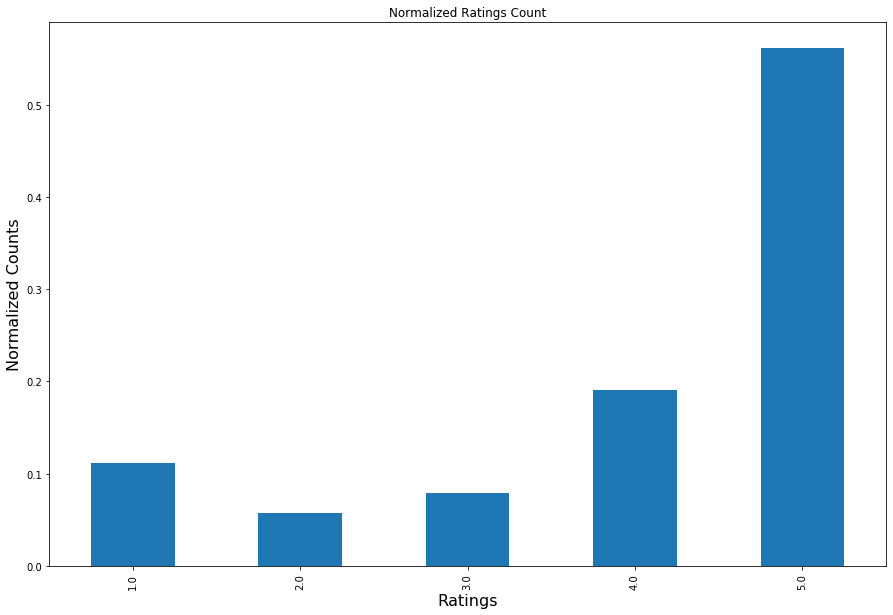

In [44]:
ax = review_distribution.set_index(['Ratings']).plot(kind='bar', title ="Normalized Ratings Count",figsize=(15,10),legend=False, fontsize=10)
ax.set_xlabel("Ratings",fontsize=16)
ax.set_ylabel("Normalized Counts",fontsize=16)